In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [470]:
items = pd.read_csv(r'C:\Users\PC\Desktop\AI Course - E-Com\exam_np_pd_plt_sns\files\Items.csv')
customers = pd.read_csv(r'C:\Users\PC\Desktop\AI Course - E-Com\exam_np_pd_plt_sns\files\customers.csv')
orders = pd.read_csv(r'C:\Users\PC\Desktop\AI Course - E-Com\exam_np_pd_plt_sns\files\orders.csv')
orders_item = pd.read_csv(r'C:\Users\PC\Desktop\AI Course - E-Com\exam_np_pd_plt_sns\files\order_item.csv')

display(items.sample(n=5))
display(customers.sample(n=5))
display(orders.sample(n=5))
display(orders_item.sample(n=5))

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
10,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True
38,5,Tablet,NaN,2739.61,190.0,Toshiba,True
30,47,Printer,Printers and Office Equipment,3704.16,239.0,Toshiba,True
36,50,Speaker,Audio Equipment,4453.90,937.0,Logitech,True
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True


,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
488,489,Boycie,Granger,Male,53.0,Brazil,NaN,522-682-1435,bgrangerdk@guardian.co.uk
9,10,Terri,Palffrey,Male,26.0,Japan,29/12/2022,438-700-1501,tpalffrey9@squarespace.com
315,316,Johnny,Garlicke,Non-binary,55.0,Brazil,11/01/2021,349-710-2727,jgarlicke8r@google.com.br
351,352,Sinclare,Brasner,Polygender,35.0,Brazil,06/08/2022,243-268-9166,sbrasner9r@topsy.com
421,422,Zarah,Collier,Female,51.0,South Korea,10/01/2022,665-110-4057,zcollierbp@mlb.com


,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
204,205,201.0,068 Mcguire Drive,3.0,2023-05-28,GIFT_CARD,WEBSITE
418,419,434.0,2 Lake View Junction,3.0,2023-10-30,CREDIT_CARD,WEBSITE
269,270,493.0,2 Northridge Avenue,2.0,2023-01-24,CASH,STORE
112,113,286.0,7 Farmco Point,NaN,2023-12-11,CASH,STORE
40,41,462.0,4961 Fieldstone Point,3.0,2023-10-01,GIFT_CARD,STORE


,id,order_id,item_id,quantity
71,72,236,45.0,1
713,714,313,NaN,2
329,330,356,36.0,6
29,30,575,34.0,1
494,495,484,32.0,5


In [471]:
# 3. 
merged_for_pricing = orders_item.merge(items[['id', 'item_price']], left_on='item_id', right_on='id', how='left')
orders_item['total_amount'] = merged_for_pricing['item_price'] * merged_for_pricing['quantity']
display(orders_item)

,id,order_id,item_id,quantity,total_amount
0,1,337,10.0,2,907.70
1,2,430,27.0,6,7703.94
2,3,430,36.0,2,6513.76
3,4,508,46.0,1,1606.65
4,5,229,27.0,2,2567.98
...,...,...,...,...,...
995,996,594,24.0,2,8899.98
996,997,330,32.0,8,12186.16
997,998,472,10.0,3,1361.55
998,999,222,29.0,1,4227.36


In [472]:
# 4. 
total_per_order = orders_item.groupby('order_id').sum()
total_per_order

,id,item_id,quantity,total_amount
order_id,,,,
1,728,34.0,5,8554.20
2,699,11.0,3,10148.58
3,271,34.0,4,6843.36
4,125,4.0,1,965.20
5,2905,24.0,25,63944.94
...,...,...,...,...
593,477,22.0,2,2301.74
594,4282,142.0,18,62560.06
596,753,86.0,7,17830.10


In [473]:
# 5. 
max_order = total_per_order['total_amount'].max()
min_order = total_per_order['total_amount'][total_per_order['total_amount']>1].min()
average_orders = total_per_order['total_amount'].mean()

print(f'Max order: {max_order}')
print(f'Min order: {min_order}')
print(f'Average order: {average_orders:.2f}')

Max order: 81267.68
Min order: 241.54
Average order: 14580.42


In [474]:
# 6. 
pivot_gender_count = customers.pivot_table(index='nationallity', columns='gender', values='id', aggfunc='count').fillna(0)
display(pivot_gender_count)

gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,1.0,0.0,10.0,1.0,0.0,9.0,0.0,1.0
Brazil,0.0,0.0,6.0,0.0,0.0,17.0,2.0,1.0
Chile,1.0,0.0,14.0,0.0,0.0,9.0,0.0,0.0
China,0.0,0.0,5.0,1.0,1.0,9.0,0.0,1.0
France,1.0,0.0,15.0,1.0,0.0,10.0,0.0,0.0
Germany,0.0,0.0,12.0,0.0,0.0,3.0,0.0,1.0
India,1.0,0.0,8.0,0.0,0.0,15.0,0.0,0.0
Isreal,2.0,1.0,20.0,5.0,1.0,31.0,0.0,2.0
Italy,0.0,0.0,15.0,0.0,2.0,11.0,0.0,0.0


# חקירה והצגה גרפית

In [476]:
items_copy = items.copy()
customer_copy = customers.copy()
orders_copy = orders.copy()
orders_item_copy = orders_item.copy()

items_copy.dropna(how='any')
customer_copy.dropna(how='any')
orders_copy.dropna(how='any')
orders_item_copy.dropna(how='any')

display(items.sample(n=5))
display(customers.sample(n=5))
display(orders.sample(n=5))
display(orders_item.sample(n=5))

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
47,29,Webcam,Printers and Office Equipment,4227.36,596.0,Dell,True
30,47,Printer,Printers and Office Equipment,3704.16,239.0,Toshiba,True
25,20,Mouse,Computers and Accessories,1333.04,881.0,Logitech,True
37,33,Surge Protector,Printers and Office Equipment,488.39,800.0,ASUS,True
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True


,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
151,152,Shandra,Arnet,Female,27.0,Peru,22/10/2022,589-526-3677,sarnet47@cmu.edu
497,498,Viv,Callander,Female,44.0,France,24/02/2021,447-685-9318,vcallanderdt@icq.com
237,238,Huey,Vallis,Male,45.0,France,17/12/2020,720-361-8791,hvallis6l@sohu.com
451,452,Billi,Aysik,Female,56.0,United States,24/02/2020,335-551-3330,baysikcj@arizona.edu
309,310,Maud,Winspare,Female,54.0,United States,20/07/2022,363-103-6495,mwinspare8l@deliciousdays.com


,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
144,145,18.0,56 Mosinee Hill,NaN,2023-10-03,CHECK,STORE
590,591,126.0,2962 Susan Street,4.0,2023-06-08,GIFT_CARD,WEBSITE
377,378,53.0,6340 Anhalt Way,3.0,2023-04-28,CREDIT_CARD,WEBSITE
400,401,70.0,23256 Saint Paul Street,3.0,2023-10-25,CHECK,WEBSITE
75,76,367.0,077 Stuart Junction,3.0,2023-05-25,CHECK,STORE


,id,order_id,item_id,quantity,total_amount
170,171,487,4.0,1,965.20
150,151,307,10.0,9,4084.65
675,676,585,25.0,5,4300.05
544,545,10,44.0,2,1447.18
331,332,457,22.0,5,5754.35


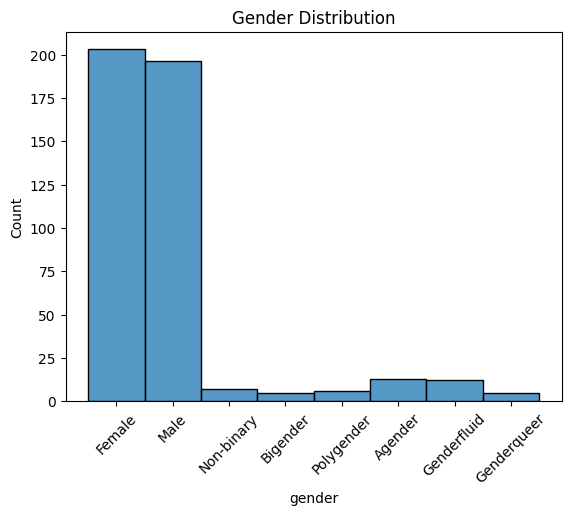

In [477]:
# 3. 
sns.histplot(customer_copy, x='gender', bins=10)
plt.xticks(rotation=45, )
plt.title('Gender Distribution')
plt.show()

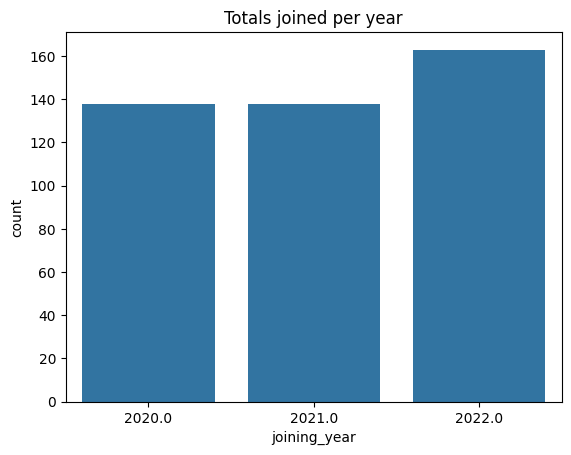

In [478]:
# 4. 
customer_copy['joining_date'] = pd.to_datetime(customer_copy['joining_date'], format="%d/%m/%Y")
customer_copy['joining_year'] = customer_copy['joining_date'].dt.year

sns.countplot(customer_copy, x='joining_year')
plt.title('Totals joined per year')
plt.show()

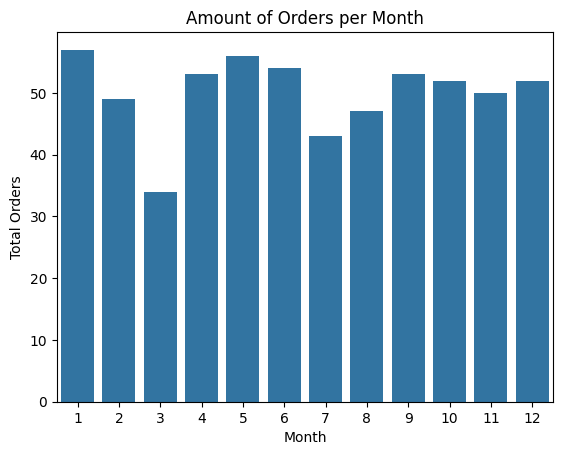

In [479]:
# 5. 
orders_copy['order_date'] = pd.to_datetime(orders_copy['order_date'], format="%Y-%m-%d")
orders_copy['order_month'] = orders_copy['order_date'].dt.month

sns.countplot(orders_copy, x='order_month')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Amount of Orders per Month')
plt.show()

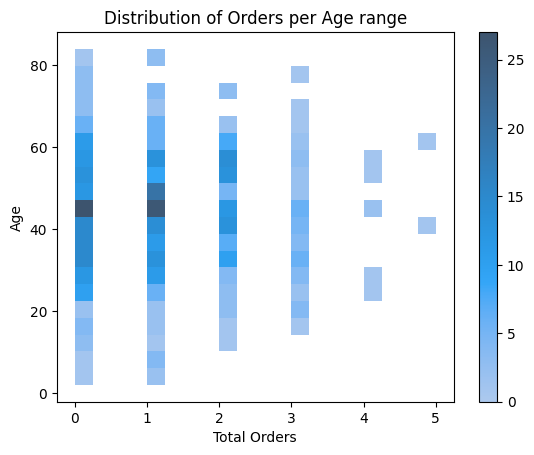

In [480]:
# 6. 
merged_for_age_distribution = customers.merge(orders, left_on='id', right_on='customer_id')
count = merged_for_age_distribution.groupby('id').agg(total_orders=('id', 'count')).reset_index()
id_total_dict = dict(zip(count['id'], count['total_orders']))
customer_copy['total_orders'] = customer_copy['id'].map(id_total_dict)
customer_copy['total_orders'] = customer_copy['total_orders'].fillna(0)

sns.histplot(customer_copy, x='total_orders', y='age', bins=20, cbar=True)
plt.xlabel('Total Orders')
plt.ylabel('Age')
plt.title('Distribution of Orders per Age range')
plt.show()

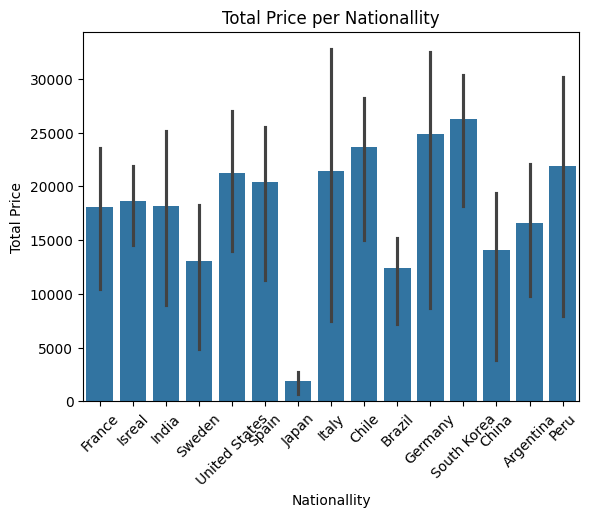

In [481]:
# 7. 
merge_for_total_per_order = orders.merge(orders_item[['order_id', 'total_amount']], left_on='order_id', right_on='order_id', how='left').groupby('customer_id')
result_map = dict(zip(merge_for_total_per_order['customer_id'].max(), merge_for_total_per_order['total_amount'].sum()))
customer_copy['total_value'] = customer_copy['id'].map(result_map)
customer_copy['total_value'] = customer_copy['total_value'].fillna(0)

sns.barplot(customer_copy, x='nationallity', y='total_value', estimator='std')
plt.xticks(rotation=45)
plt.xlabel('Nationallity')
plt.ylabel('Total Price')
plt.title('Total Price per Nationallity')
plt.show()
